# Shallow RBF Network
Below is a very simple demonstration of a shallow RBF network. As opposed to dense layers, where input vectors are linearly transformed ($W*x+b$), in an RBF layer, the distance from the input to each in a set of <b>trainable</b> reference vectors is calculated ($||v_i-x||$). A classification layer can then be trained on the outputs of the RBF layer (traditionally grouped with the rbf layer as weights)

To see an example on an on an untransformed input, let's look at the common moons example from sklearn below. This is a gif of classification as the network is being trained. The red dots are the RBF vectors. You can see how the network learns where to place the vectors and how to interpret classes.

<img src="rbf_centers.gif" width="400" height="400" />

In [8]:
import torch
from torch import nn
import numpy as np
from sklearn.datasets import make_moons
from sklearn.metrics import f1_score
from rbf import RBF

In [9]:
class shallow_rbf(nn.Module):
    def __init__(self, d_in, k, n_classes, pre_transform=False):
        """
        """
        super(shallow_rbf, self).__init__()
        self.net = nn.Sequential()
        
        if(pre_transform):
            self.net.add_module('dense', nn.Linear(d_in, d_in))
            self.net.add_module('activation', nn.LeakyReLU())
        self.net.add_module('rbf', RBF(d_in=d_in, k=k))
        self.net.add_module('weights', nn.Linear(k, n_classes))
        self.net.add_module('softmax', nn.Softmax(dim=1))
        
    def forward(self, x):
        y = self.net(x)
        return(y)

In [5]:
X_, Y_ = make_moons(1000, noise=.15)

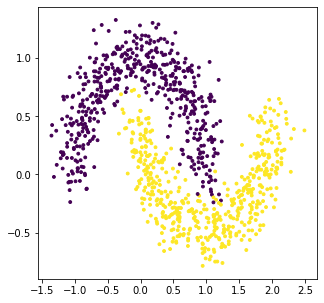

In [12]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(5,5))
plt.scatter(X_[:,0], X_[:,1], c=Y_, s=8)

In [26]:
shallow = shallow_rbf(d_in=2, k=20, n_classes=2).float()

In [27]:
X = torch.tensor(X_).float()
Y = torch.tensor(Y_)#.float()

In [28]:
n = X.shape[0]
inds = np.random.permutation(n)
split = .8
train = inds[:int(split*n)]
val = inds[int(split*n):]

In [29]:
lr = .05
optimizer = torch.optim.SGD([
    {'params' : shallow.parameters(), 'lr':lr},
    ], 
    lr=lr)
# now = datetime.datetime.now()
reps = 100
# base = list(list(list(shallow.children())[0].children())[1].parameters())[1].data.numpy()
# with torch.no_grad():
#     y = shallow(X)
# Y__ = torch.argmax(y, dim=1).numpy()
# fig = plt.figure(rep, figsize=(10,10))
# plt.scatter(X_[:,0], X_[:,1], c=Y__)
# plt.scatter(base[:,0], base[:,1], c='r')
# plt.savefig('images/rep_-1_{dt}.png'.format(dt=now))
# plt.close(rep)
validation = '?'
for rep in range(reps):
    for i in range(200):
        optimizer.zero_grad()
        y = shallow(X[train])
    #     print(y.shape, Y.shape)
        loss = nn.CrossEntropyLoss()(y,Y[train])
    #     nn.MSELoss()(y,Y)
        loss.backward()
        optimizer.step()
        print('train loss: {loss}, val: {val}'.format(loss=loss.item(), val=validation), end='    \r')
#     print('\ndone!')
#     base = list(list(list(shallow.children())[0].children())[1].parameters())[1].data.numpy()
    with torch.no_grad():
        y = shallow(X[val])
    Y_pred = torch.argmax(y, dim=1).numpy()
    validation = f1_score(Y[val], Y_pred)
#     fig = plt.figure(rep, figsize=(10,10))
#     plt.scatter(X_[:,0], X_[:,1], c=Y__)
#     plt.scatter(base[:,0], base[:,1], c='r')
#     plt.savefig('images/rep_{rep}_{dt}.png'.format(rep=rep, dt=now))
#     plt.close(rep)

KeyboardInterrupt: 